In [1]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
spamreader = pd.read_csv("badabybadabu.csv")
unano = spamreader[spamreader["Year"]==2011]
x_obs=np.array(unano["Health_expenditure_per_capita_PPP"])
y_obs=np.array(unano["Years_Lived_With_Disability"])
sigma_y_obs = np.std(y_obs)

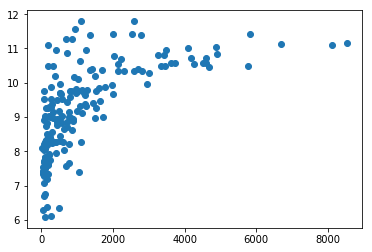

In [3]:
plt.scatter(x_obs,y_obs)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Usando Gauss 0.5031892627054015 7.0101367295704735
Usando Chi cuadrado 0.6303821828123753 6.083177318594526
Usando Gauss 0.5710080429379961 6.800478325071208
Usando Chi cuadrado 0.6807331787037404 6.907023115756131


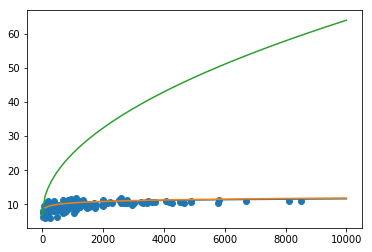

In [7]:
#Definimos los modelos
def modelo(mode,x,a,b):
    if mode==1:
        return a*np.log(x)+b
    if mode ==2:
        return a*np.sqrt(x)+b

#Definimos las likelihood
def loglikelihood(mode,x_obs, y_obs, sigma_y_obs, a, b):
    #Usando Gauss
    d = y_obs -  modelo(mode,x_obs, a, b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    #Usando Chi cuadrado
    e = np.log(1/(np.sqrt(2*x_obs*np.pi)))
    e = e - x_obs/2
    return d , e

#Definimos un prior
def logprior(a, b):
    p = np.random.random()
    if a > 0.4 and b>2:
        p = 0.0
    return p


N = 50000
#Listas del Modelo 1
lista_a1 = [np.random.random()]
lista_b1 = [np.random.random()+min(y_obs)]
lista_a1_2 = [np.random.random()]
lista_b1_2 = [np.random.random()+min(y_obs)]
#Listas del Modelo 2
lista_a2 = [np.random.random()]
lista_b2 = [np.random.random()+min(y_obs)]
lista_a2_2 = [np.random.random()]
lista_b2_2 = [np.random.random()+min(y_obs)]

logposterior1 = [loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1[0], lista_b1[0])[0] + logprior(lista_a1[0], lista_b1[0])]
logposterior1_2 = [loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1_2[0], lista_b1_2[0])[1] + logprior(lista_a1_2[0], lista_b1_2[0])]
logposterior2 = [loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2[0], lista_b2[0])[0] + logprior(lista_a2[0], lista_b2[0])]
logposterior2_2 = [loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2_2[0], lista_b2_2[0])[1] + logprior(lista_a2_2[0], lista_b2_2[0])]

#Los deltas de movimiento para cada modelo
sigma_delta_a1 = 0.1
sigma_delta_b1 = 0.5
sigma_delta_a2 = 0.05
sigma_delta_b2 = 0.5

for i in range(1,N):
    propuesta_a1  = lista_a1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a1)
    propuesta_b1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    propuesta_a1_2  = lista_a1_2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a1)
    propuesta_b1_2  = lista_b1_2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    
    propuesta_a2  = lista_a2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a2)
    propuesta_b2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b2)
    propuesta_a2_2  = lista_a2_2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a2)
    propuesta_b2_2  = lista_b2_2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b2)

    logposterior_viejo1 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1[i-1], lista_b1[i-1])[0] + logprior(lista_a1[i-1], lista_b1[i-1])
    logposterior_nuevo1 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, propuesta_a1, propuesta_b1)[0] + logprior(propuesta_a1, propuesta_b1)
    
    logposterior_viejo1_2 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1_2[i-1], lista_b1_2[i-1])[1] + logprior(lista_a1_2[i-1], lista_b1_2[i-1])
    logposterior_nuevo1_2 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, propuesta_a1_2, propuesta_b1_2)[1] + logprior(propuesta_a1_2, propuesta_b1_2)

    logposterior_viejo2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2[i-1], lista_b2[i-1])[0] + logprior(lista_a2[i-1], lista_b2[i-1])
    logposterior_nuevo2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, propuesta_a2, propuesta_b2)[0] + logprior(propuesta_a2, propuesta_b2)
    
    logposterior_viejo2_2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2_2[i-1], lista_b2_2[i-1])[1] + logprior(lista_a2_2[i-1], lista_b2_2[i-1])
    logposterior_nuevo2_2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, propuesta_a2_2, propuesta_b2_2)[1] + logprior(propuesta_a2_2, propuesta_b2_2)
    
    r = 1-np.exp(logposterior_nuevo1-logposterior_viejo1)
    g = 1-np.exp(logposterior_nuevo1_2-logposterior_viejo1_2)
    
    r2 = 1-np.exp(logposterior_nuevo2-logposterior_viejo2)
    g2 = 1-np.exp(logposterior_nuevo2_2-logposterior_viejo2_2)
    
    if(0<r):
        lista_a1.append(propuesta_a1)
        lista_b1.append(propuesta_b1)
        logposterior1.append(logposterior_nuevo1)
    else:
        lista_a1.append(lista_a1[i-1])
        lista_b1.append(lista_b1[i-1])
        logposterior1.append(logposterior_viejo1) 
    if(0<g[0]):
        lista_a1_2.append(propuesta_a1_2)
        lista_b1_2.append(propuesta_b1_2)
        logposterior1_2.append(logposterior_nuevo1_2)
    else:
        lista_a1_2.append(lista_a1_2[i-1])
        lista_b1_2.append(lista_b1_2[i-1])
        logposterior1_2.append(logposterior_viejo1_2)
        
    if(0<r2):
        lista_a2.append(propuesta_a2)
        lista_b2.append(propuesta_b2)
        logposterior2.append(logposterior_nuevo2)
    else:
        lista_a2.append(lista_a2[i-1])
        lista_b2.append(lista_b2[i-1])
        logposterior2.append(logposterior_viejo2) 
    if(0<g2[0]):
        lista_a2_2.append(propuesta_a2_2)
        lista_b2_2.append(propuesta_b2_2)
        logposterior2_2.append(logposterior_nuevo2_2)
    else:
        lista_a2_2.append(lista_a2_2[i-1])
        lista_b2_2.append(lista_b2_2[i-1])
        logposterior2_2.append(logposterior_viejo2_2)
        
lista_a1 = np.array(lista_a1)
lista_b1 = np.array(lista_b1)
logposterior1 = np.array(logposterior1)
lista_a1_2 = np.array(lista_a1_2)
lista_b1_2 = np.array(lista_b1_2)
logposterior1_2 = np.array(logposterior1_2)

lista_a2 = np.array(lista_a2)
lista_b2 = np.array(lista_b2)
logposterior2 = np.array(logposterior2)
lista_a2_2 = np.array(lista_a2_2)
lista_b2_2 = np.array(lista_b2_2)
logposterior2_2 = np.array(logposterior2_2)

new_x = np.linspace(0,10000,100)
y_model = modelo(1,new_x,np.mean(lista_a1),np.mean(lista_b1))
y_model_1 = modelo(1,new_x,np.mean(lista_a1_2),np.mean(lista_b1_2))
y_model2 = modelo(2,new_x,np.mean(lista_a2),np.mean(lista_b2))
y_model2_1 = modelo(2,new_x,np.mean(lista_a2_2),np.mean(lista_b2_2))
plt.scatter(x_obs,y_obs)
plt.plot(new_x, y_model)
plt.plot(new_x, y_model_1)
plt.plot(new_x, y_model2)
#plt.plot(new_x, y_model2_1)
print ('Usando Gauss',np.mean(lista_a1),np.mean(lista_b1))
print('Usando Chi cuadrado',np.mean(lista_a1_2),np.mean(lista_b1_2))
print ('Usando Gauss',np.mean(lista_a2),np.mean(lista_b2))
print('Usando Chi cuadrado',np.mean(lista_a2_2),np.mean(lista_b2_2))

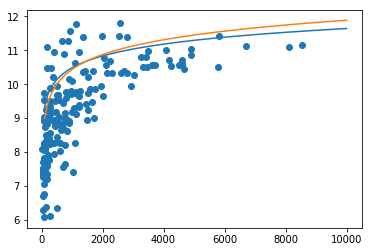

In [12]:
plt.scatter(x_obs,y_obs)
plt.plot(new_x, y_model)
plt.plot(new_x, y_model_1)
#plt.plot(new_x, y_model2)
#plt.plot(new_x, y_model2_1)